 RUN IN CHRONOLOGICAL ORDER

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf


-------------------------------------------------Collecting appropriate data for machine Learning ----------------------------------------------

In [2]:
start = '2017-01-01'
end='2023-05-01'

time_start= datetime.strptime(start,'%Y-%m-%d').date()
time_end= datetime.strptime(end,'%Y-%m-%d').date()

df= yf.download('GOOG', time_start,time_end)#scrapping the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000
2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000
2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000
2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000
2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26604400
2023-01-09,87.360001,89.870003,88.949997,89.800003,89.800003,2570372


Features of the dataset

In [41]:
df.describe()

,Open,High,Low,Close,Volume
count,1515.000000,1515.000000,1515.000000,1515.000000,1.515000e+03
mean,79.337129,80.194451,78.519688,79.368536,3.070017e+07
std,32.180684,32.543651,31.793487,32.151824,1.338862e+07
min,38.940498,39.481499,38.790001,39.306999,2.570372e+06
25%,54.191000,54.775749,53.614050,54.233000,2.215400e+07
50%,64.800003,65.321251,64.561447,64.920502,2.725600e+07
75%,103.944752,105.465000,103.130753,104.702000,3.476325e+07
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08


In [42]:
df.shape

(1515, 5)

Understanding Machine Learning data via visualisation

In [46]:
df.nunique() # number of unique values in each column

Open      1482
High      1501
Low       1498
Close     1502
Volume    1466
dtype: int64

In [47]:
df['Close'].unique() #unique values in the close price column

array([39.30699921, 39.34500122, 39.70100021, ..., 86.76999664,
       88.16000366, 89.80000305])

In [48]:
# creating bool series True for NaN values
bool_series = pd.notnull(df["Low"])

# filtering data
# displaying data only with team = NaN
df[bool_series]

,Open,High,Low,Close,Volume
0,38.940498,39.481499,38.790001,39.306999,33146000
1,39.417999,39.567001,39.158001,39.345001,21460000
2,39.304001,39.723999,39.250999,39.701000,26704000
3,39.763000,40.395000,39.610199,40.307499,32804000
4,40.320000,40.498299,40.141499,40.332500,25492000
...,...,...,...,...,...
1510,89.830002,91.550003,89.019997,89.699997,20738500
1511,91.010002,91.239998,87.800003,88.709999,27046500
1512,88.070000,88.209999,86.559998,86.769997,23136100
1513,87.360001,88.470001,85.570000,88.160004,26604400


In [49]:
# creating bool series True for NaN values
bool_series = pd.isnull(df["Close"])

# filtering data
# displaying data only with team = NaN
df[bool_series]

,Open,High,Low,Close,Volume


In [4]:
df = df.reset_index()# reseting the index
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000
1,2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000
2,2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000
3,2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000
4,2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()#dropping columns because we want to predict closing price

,Open,High,Low,Close,Volume
0,38.940498,39.481499,38.790001,39.306999,33146000
1,39.417999,39.567001,39.158001,39.345001,21460000
2,39.304001,39.723999,39.250999,39.701000,26704000
3,39.763000,40.395000,39.610199,40.307499,32804000
4,40.320000,40.498299,40.141499,40.332500,25492000


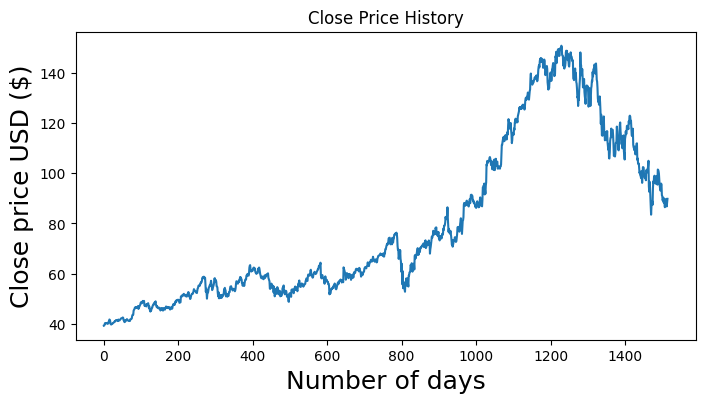

In [54]:
#visualising the closing price history
plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Number of days', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [55]:
ma100 = df.Close.rolling(100).mean()# averages of a particular timeframe


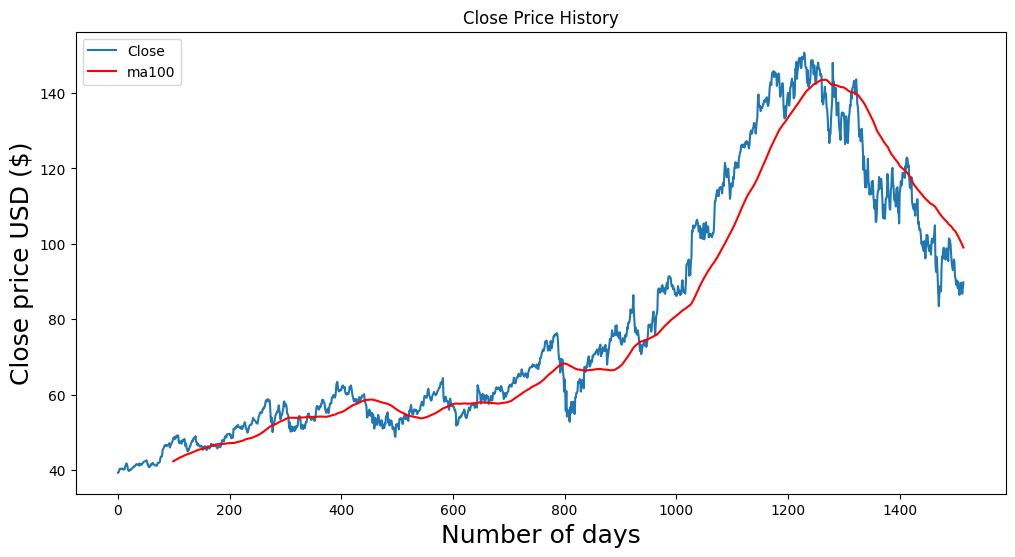

In [59]:
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.xlabel('Number of days', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.legend(['Close','ma100'], loc = 'upper left')

In [60]:
ma200= df.Close.rolling(200).mean()


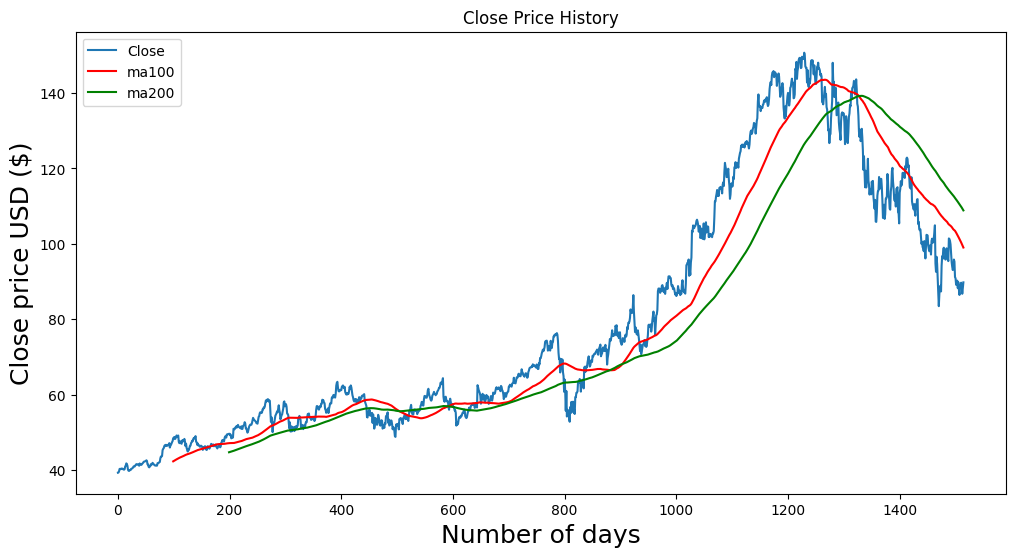

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.title('Close Price History')
plt.xlabel('Number of days', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.legend(['Close','ma100','ma200'], loc = 'upper left')

Data Preprocessing

In [13]:
#spliting data into training and testing
#what we usually do for data predtictions

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])#70% of data in training whislt the rest is in testing
data_testing = pd.DataFrame(df['Close'][int(len(df) *0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1060, 1)
(455, 1)


In [14]:
data_training.head()

,Close
0,39.306999
1,39.345001
2,39.701000
3,40.307499
4,40.332500


In [15]:
data_testing.head()

,Close
1060,101.929497
1061,102.648003
1062,102.252998
1063,102.218002
1064,101.777496


In [16]:
#scaling down the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.00000000e+00],
       [5.66277230e-04],
       [5.87110457e-03],
       ...,
       [9.72261397e-01],
       [9.31387231e-01],
       [9.36587864e-01]])

In [62]:
data_training_array.shape

(1060, 1)

In [19]:
x_train =[]#independent values of past share prices that will help us to predict the next value
y_train = []#to be predicted and is dependent on x_train
# the value of the share price on the 101th day is dependent on the previous days.
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

x_train.shape

(960, 100, 1)

Machine Learning Model

In [21]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
import tensorflow as tf

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))#to connect all the layers


In [24]:
model.summary()#see the summary of the LSTM model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)# different loss functions but here we are doing time series analysis

Epoch 1/50
30/30 [==============================] - 16s 253ms/step - loss: 0.0487
Epoch 2/50
30/30 [==============================] - 6s 207ms/step - loss: 0.0125
Epoch 3/50
30/30 [==============================] - 6s 203ms/step - loss: 0.0094
Epoch 4/50
30/30 [==============================] - 6s 202ms/step - loss: 0.0078
Epoch 5/50
30/30 [==============================] - 7s 232ms/step - loss: 0.0065
Epoch 6/50
30/30 [==============================] - 7s 216ms/step - loss: 0.0081
Epoch 7/50
30/30 [==============================] - 6s 209ms/step - loss: 0.0063
Epoch 8/50
30/30 [==============================] - 6s 207ms/step - loss: 0.0069
Epoch 9/50
30/30 [==============================] - 7s 234ms/step - loss: 0.0066
Epoch 10/50
30/30 [==============================] - 7s 240ms/step - loss: 0.0061
Epoch 11/50
30/30 [==============================] - 7s 235ms/step - loss: 0.0058
Epoch 12/50
30/30 [==============================] - 7s 225ms/step - loss: 0.0054
Epoch 13/50
30/30 [=====

In [40]:
model.save('keras_model.h5')#save the model, so we can use it for streamlit web application

In [27]:
data_testing.head()#predicting the values for testing data

,Close
1060,101.929497
1061,102.648003
1062,102.252998
1063,102.218002
1064,101.777496


In [28]:
#predicting the values for testing data
past_100_days = data_training.tail(100)#to get us the share prices from the past 100 days

In [29]:
final_df = past_100_days.append(data_testing,ignore_index=True)# to remove the index numbers

C:\Users\ekhat\AppData\Local\Temp\ipykernel_25308\2178939483.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)# to reomve the index numbers


In [30]:
final_df.head()

,Close
0,79.522499
1,80.212997
2,75.831001
3,78.362000
4,81.050499


In [31]:
#scaling
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04930017],
       [0.05852181],
       [0.        ],
       [0.03380163],
       [0.06970669],
       [0.07305881],
       [0.08920507],
       [0.15525917],
       [0.16476805],
       [0.16368627],
       [0.16452096],
       [0.14942306],
       [0.15764974],
       [0.15573327],
       [0.17388281],
       [0.17679424],
       [0.16929537],
       [0.15368995],
       [0.16513526],
       [0.15062496],
       [0.14573032],
       [0.16844733],
       [0.17015013],
       [0.1846804 ],
       [0.16301185],
       [0.18795905],
       [0.20789148],
       [0.20710356],
       [0.20791817],
       [0.20223561],
       [0.20161459],
       [0.17863052],
       [0.17275437],
       [0.17705468],
       [0.16255773],
       [0.16770607],
       [0.16452096],
       [0.15443783],
       [0.14315951],
       [0.14874192],
       [0.13814474],
       [0.14407439],
       [0.14839467],
       [0.17326178],
       [0.16166292],
       [0.14884207],
       [0.15709555],
       [0.141

In [32]:
input_data.shape#closing price column

(555, 1)

In [33]:
x_test =[]
y_test=[]

for i in range(100,input_data.shape[0]):#555
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [34]:
#convert to numpy arrays
x_test, y_test = np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(455, 100, 1)
(455,)


In [35]:
# making predcitions

y_predicted = model.predict(x_test)

15/15 [==============================] - 4s 83ms/step


In [36]:
y_predicted.shape

(455, 1)

In [37]:
scaler.scale_#finds the factor at which one was scaled down

array([0.01335506])

In [38]:
scale_factor = 1/0.013355

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [63]:
#Evaluate the model via the Root Mean Squared Error(RMSE)
rmse = np.sqrt(np.mean(y_predicted - y_test)** 2)
print("the root mean square error",rmse)


the root mean square error 2.8151243822752874


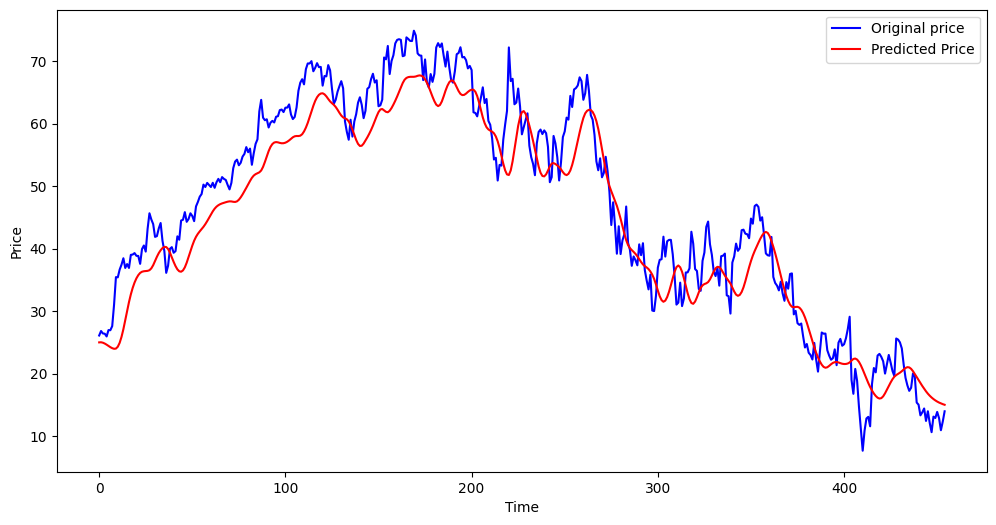

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()